In [ ]:
"""
Introduction


1. Normal distribution and Assumptions
2. Normality Checks - QQ Plot( Expected Quantile vs Actual Quantile), Shapiro Wilk's Test
3. Non Parametrics - Basics
4. Wilxocon's rank-sum - two sample t-test ind equivalent
5. Wilxocon's signed-rank - paired t-test equivalent
6. Spearman correlation for non linear relationships - pearson for linear relationships

"""

In [7]:
import pandas as pd 
import numpy as np
import plotnine as p9

from scipy import stats 

In [5]:
#Checking the normal distribution
df = pd.DataFrame({
'ObsNo':[i for i in np.arange(1000)],
'Value':[np.random.randint(0,100) for i in np.arange(1000)]
})
df.head()


,ObsNo,Value
0,0,48
1,1,86
2,2,10
3,3,70
4,4,40


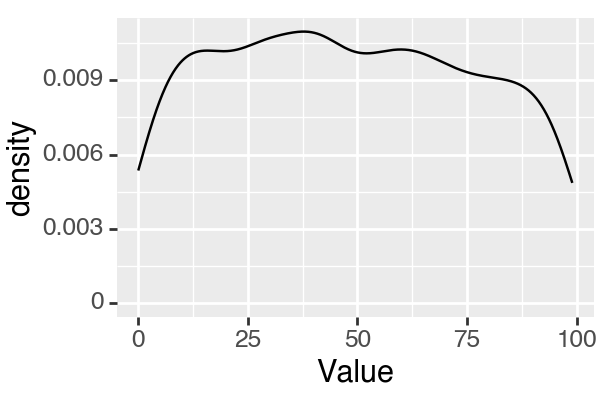

In [11]:
print(p9.ggplot(df)
      +p9.aes(x='Value')
      +p9.geom_density()
      +p9.theme(figure_size=(3,2)))

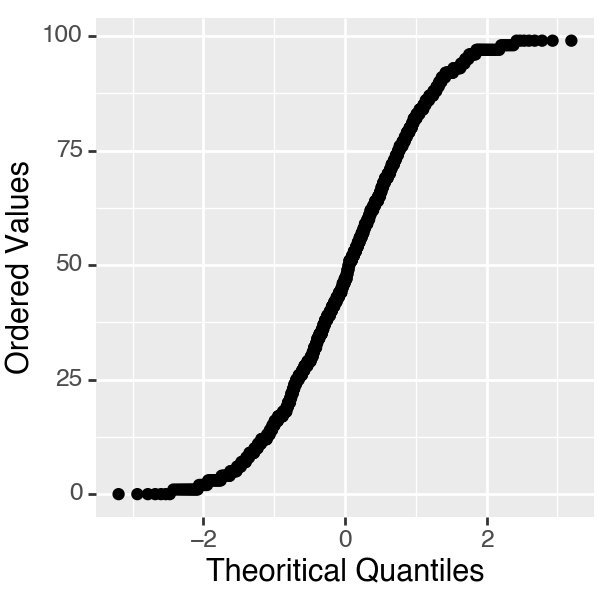

In [9]:
tq = stats.probplot(df.Value,dist='norm')
df_qq = pd.DataFrame({
    'Theoritical Quantiles' : tq[0][0],
    'Ordered Values': df.Value.sort_values()
})


print(p9.ggplot(df_qq)
      + p9.aes('Theoritical Quantiles','Ordered Values')
      + p9.geom_point()
      + p9.theme(figure_size=(3,3))
      )

In [14]:
#Test for normality
#Normality check not required for large samples
#shapiro-wilk test - works only small sample  
# 1 for perfect normality => 0 for non normality 



shapiro = stats.shapiro(df.Value)
if ((shapiro[0] > 0.75) & (shapiro[1] < 0.05)):
    print('Normally distributed')
else:
    print('No statistical evidence for normality')

print(shapiro)


Normally distributed
ShapiroResult(statistic=0.9579771757125854, pvalue=2.4111200478199525e-16)


In [ ]:
"""
Non Parametrics test:
1. Makes few assumption
2. No fixed population parameter
3. Doesn't make any assumption underlying distribution 
"""

In [17]:
#Wilcoxon Rank-sum test 
"""
Another name => Mann-Whitney U Test 
equivalent for t-test when non parametrics
Hypothesis : random sample A > random sample B ( instead of sample A mean == sample B mean )
No sensivity to distribution

Interpretation:
p < 0.05, there is difference 
negative value in the statistics - sample B Median > sample A Median
"""

sample1 = [np.random.randint(0,100) for i in np.arange(100)]
sample2 = [np.random.randint(0,100) for i in np.arange(100)]

ranksum = stats.ranksums(sample1,sample2)
print(ranksum)

RanksumsResult(statistic=1.7470230542951646, pvalue=0.08063333914284944)


In [16]:
#wilcoxon signed-rank test
#equivalent for paired - t-test

signrank = stats.wilcoxon(sample1,sample2)
print(signrank)

WilcoxonResult(statistic=2273.0, pvalue=0.4807535150182577)


In [18]:
#Spearman Correltion
"""
- Equivalent to the pearson correlation for non-parametric data
- Based on rank
- robust to outliers

Assumption
there is monotonic relationship
"""

'\n- Equivalent to the pearson correlation for non-parametric data\n- Based on rank\n- robust to outliers\n\nAssumption\nthere is monotonic relationship\n'

In [19]:
rho = stats.spearmanr(sample1,sample2)
print(rho)

SignificanceResult(statistic=0.18684887483456078, pvalue=0.06268399740265558)


In [20]:
pearcorr = stats.pearsonr(sample1,sample2)
print(pearcorr)

PearsonRResult(statistic=0.1782393893186757, pvalue=0.07602661282676403)
